# Data Investigation
Goal is to load and look at the data

## Setup

### Imports

In [1]:
import os
import os.path as op
import mne 
import numpy as np
import matplotlib.pyplot as plt

from utils import load_eeg, load_labels, get_event_epochs, plot_eeg


### Directories/Pathing

In [2]:
data_dir = op.join('..', 'Data')

## Markers

In [3]:
markers: list[str] = ['S', 'K', 'REM', 'Son', 'Soff', 'A', 'MS', ]
marker_colors: dict[str] = {
    'S': 'r',
    'K': 'g',
    'REM': 'b',
    'Son': 'm',
    'Soff': 'c',
    'A': 'y',
    'MS': 'k',
}

## Load in some data
- Using pre-made loading functions from https://github.com/BCI-I/BCII-IDUN-Challenge-tutorials in *utils.py*

In [4]:
subject: str = "S001"

eeg = load_eeg(data_dir, subject)

labels = load_labels(data_dir, subject)

labels.head()

Creating RawArray with float64 data, n_channels=1, n_times=5394412
    Range : 0 ... 5394411 =      0.000 ... 21577.644 secs
Ready.
<Info | 7 non-empty values
 bads: []
 ch_names: EEG1
 chs: 1 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 1
 projs: []
 sfreq: 250.0 Hz
>


,Marker,Timestamp_samples,Epoch
0,REM,38643,6
1,REM,39196,6
2,REM,39404,6
3,REM,40046,6
4,REM,40725,6


## Create epochs around each event
get_event_epochs returns a mne.Epochs object, which we can then extract the data from. _data is a numpy array of shape (n_epochs, n_samples). Here, with 30s epochs, n_samples is 7500 (data acquired at 250 Hz). n_epochs varies across subjects. We either through all Markers and concatenate the data.


In [5]:
epoch_eeg_data = []
epoch_labels = []

for marker in markers:
    epochs = get_event_epochs(eeg, labels, marker)
    if epochs is None:
        print(f"!!! --- No epochs found for marker {marker}")
        continue

    _data = epochs.get_data()[:, 0, :]
    epoch_eeg_data.append(_data)
    epoch_labels.append(np.full(len(_data), marker))

assert len(epoch_eeg_data) == len(epoch_labels)

Not setting metadata
210 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 210 events and 7501 original time points ...
0 bad epochs dropped
Not setting metadata
199 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 199 events and 7501 original time points ...
0 bad epochs dropped
Not setting metadata
170 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 170 events and 7501 original time points ...
0 bad epochs dropped
Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 29 events and 7501 original time points ...
0 bad epochs dropped
Not setting metadata
18 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 18 events and 7501 original time p

c:\Users\surge\Documents\GitHub\SURGE-NeuroTech-Club-IDUN-EEG-Analysis-Challenge\Code\utils.py:66: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, events=events, tmin=tmin, tmax=tmax, baseline=None, preload=True)
c:\Users\surge\Documents\GitHub\SURGE-NeuroTech-Club-IDUN-EEG-Analysis-Challenge\Code\utils.py:66: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, events=events, tmin=tmin, tmax=tmax, baseline=None, preload=True)
c:\Users\surge\Documents\GitHub\SURGE-NeuroTech-Club-IDUN-EEG-Analysis-Challenge\Code\utils.py:66: RuntimeWarning: The events passed to the Epochs constructor are not chronologically ordered.
  epochs = mne.Epochs(raw, events=events, tmin=tmin, tmax=tmax, baseline=None, preload=True)
c:\Users\surge\Documents\GitHub\SURGE-NeuroTech-Club-IDUN-EEG-Analysis-Challenge\Code\utils.py:66: RuntimeWarning: The events passed to the Epoch

## Finally, concatenate the data. 
We store all EEG epochs in X of shape (n_epochs, n_samples) and all labels in y of shape (n_epochs,).


In [6]:
X = np.concatenate(epoch_eeg_data, axis=0)
y = np.concatenate(epoch_labels, axis=0)

print(X.shape, y.shape)

(655, 7501) (655,)


## Plot some data

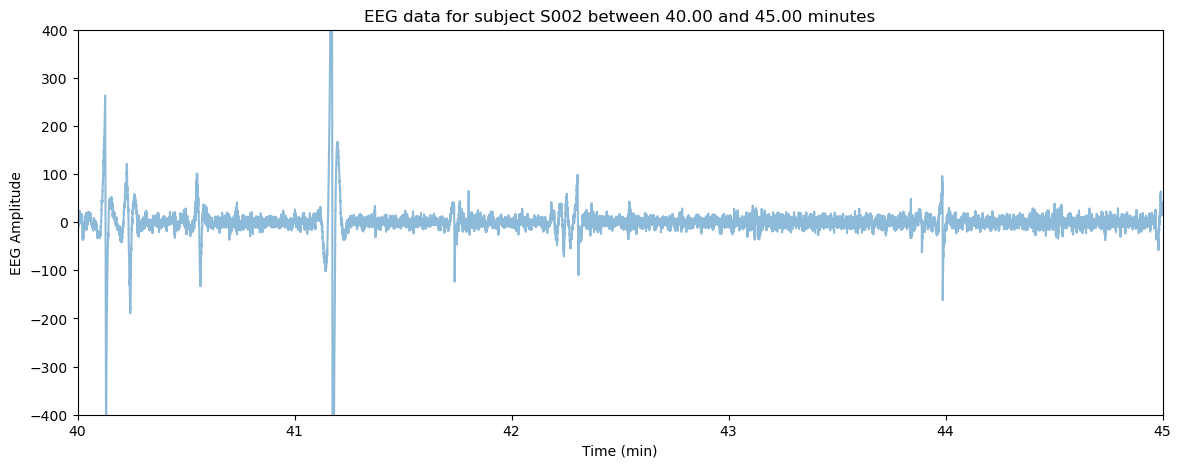

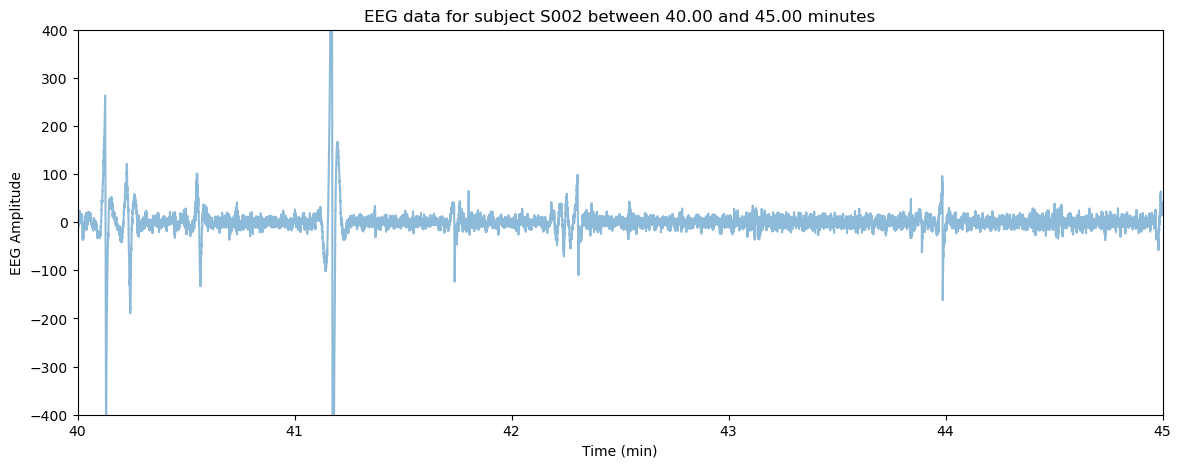

In [7]:
plot_eeg(eeg, 'S002', 40, 45)[0]

In [8]:
labels = load_labels(data_dir, subject)
labels = labels[labels.Marker.isin(markers)]
print(labels.head())

  Marker  Timestamp_samples  Epoch
0    REM              38643      6
1    REM              39196      6
2    REM              39404      6
3    REM              40046      6
4    REM              40725      6


In [9]:
print("\nCounts of each marker:")
print(labels.Marker.value_counts())


Counts of each marker:
Marker
S       210
K       199
REM     170
Son      29
A        22
Soff     18
MS        7
Name: count, dtype: int64


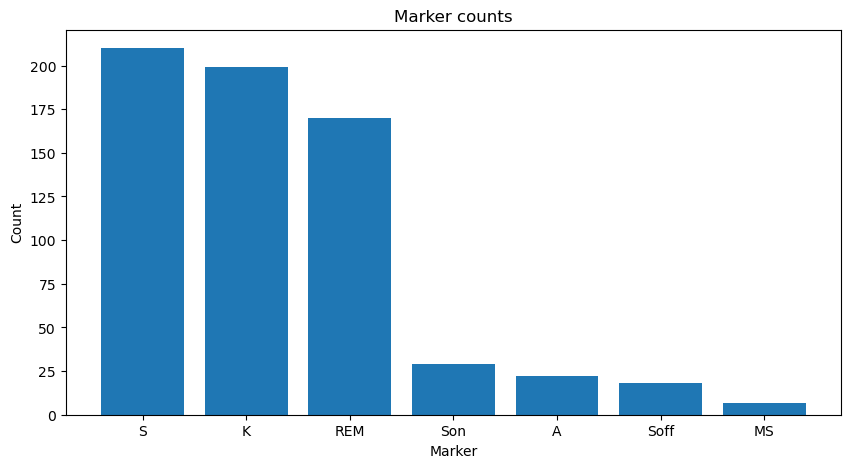

In [10]:
f, ax = plt.subplots(figsize=(10, 5))
ax.bar(labels.Marker.value_counts().index, labels.Marker.value_counts().values)
ax.set(title="Marker counts", xlabel="Marker", ylabel="Count")
plt.show()

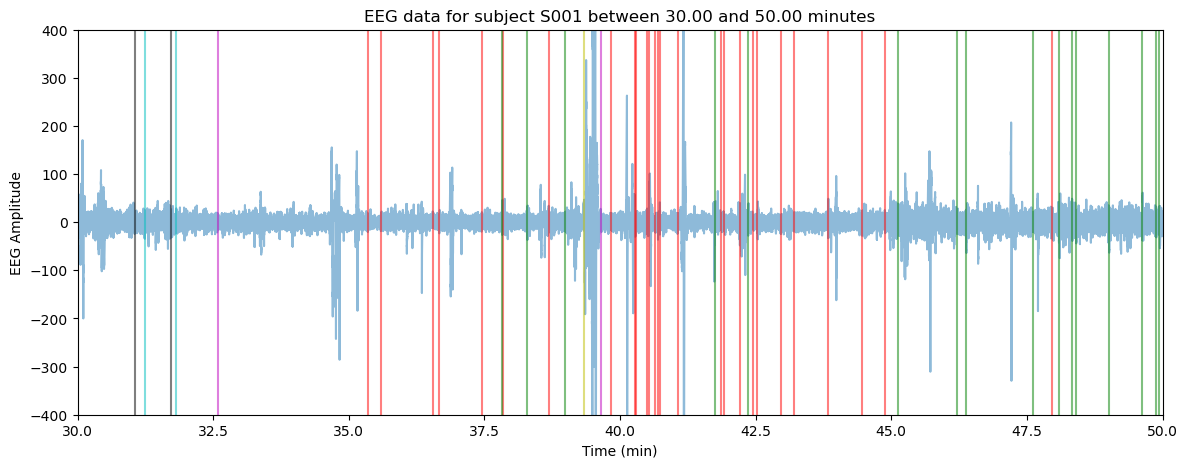

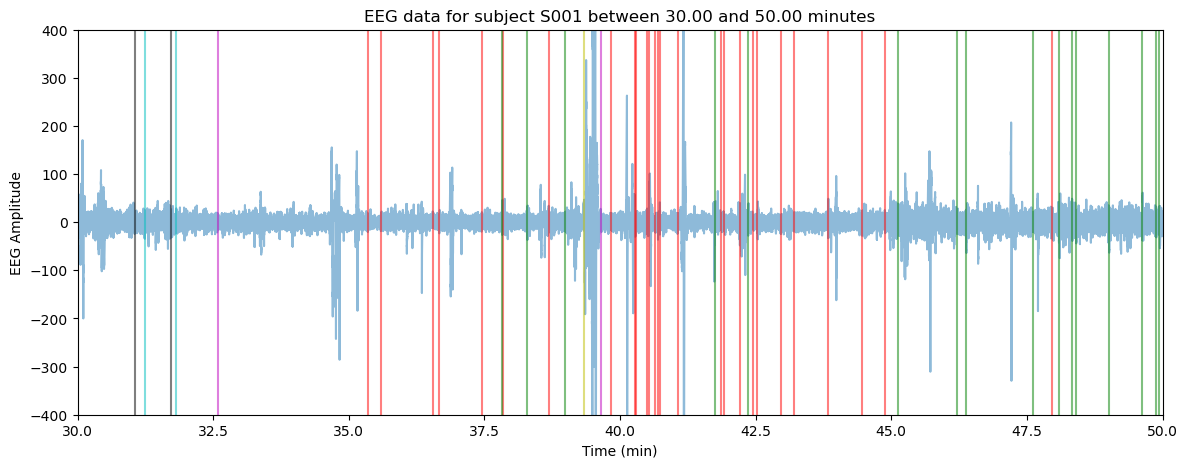

In [11]:
plot_eeg(eeg, subject, 30, 50, labels)[0]